In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import talib
import mpl_finance as mpf
%matplotlib inline
import seaborn as sns
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
import csv
import time
plt.rcParams['font.family']='SimHei' # 顯示中文('SimHei' for MacOS)

'''today = date.today()
print(today.strftime("%Y%m%d"))'''

fina=input('輸入個股代碼(ex:1101)：')
date=input('輸入日期(ex:2018/10/01)：')

inday=datetime.datetime.strptime(date,"%Y/%m/%d")
inday=datetime.datetime.strptime(inday.strftime('%Y/%m/'+'01'),"%Y/%m/%d")
ago=[(inday+relativedelta(years=-1)+relativedelta(months=+i)).strftime('%Y%m%d') for i in range(13) ]
ago

month = ago[0]
data = {
    'response':'json',
    'date': month,
    'stockNo':fina,
}
dres = requests.get('https://www.twse.com.tw/exchangeReport/STOCK_DAY?', params=data)
result = json.loads(dres.text)
df1 = pd.DataFrame(result['data'])
df1.columns = result['fields']
print(month)
time.sleep(3)

for month in ago[1:13] :
    data = {
        'response':'json',
        'date': month,
        'stockNo':fina,
    }
    dres = requests.get('https://www.twse.com.tw/exchangeReport/STOCK_DAY?', params=data)
    result = json.loads(dres.text)
    tmp = pd.DataFrame(result['data'])
    tmp.columns = result['fields']
    df1=df1.append(tmp).reset_index(drop=True)
    print(month)
    time.sleep(3)

df1['開盤價']=df1['開盤價'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['最高價']=df1['最高價'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['最低價']=df1['最低價'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['收盤價']=df1['收盤價'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['成交股數']=df1['成交股數'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['成交金額']=df1['成交金額'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['成交筆數']=df1['成交筆數'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['漲跌價差']=df1['漲跌價差'].str.replace('+','')
df1['漲跌價差']=df1['漲跌價差'].str.replace('X','').astype(dtype=float,errors='ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
indexNames = df1[ df1['成交金額'] == 0 ].index
df1 = df1.drop(indexNames)
df1=df1.reset_index(drop=True)
df1

輸入個股代碼(ex:1101)：2727
輸入日期(ex:2018/10/01)：2018/05/06
20170501
20170601
20170701
20170801
20170901
20171001
20171101
20171201
20180101
20180201
20180301
20180401
20180501


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,106/05/02,1647639.0,260778999.0,153.5,162.5,152.5,162.0,9.5,1288.0
1,106/05/03,795817.0,128330220.0,163.0,164.5,159.0,160.0,-2.0,681.0
2,106/05/04,483316.0,77372060.0,160.0,161.5,157.5,161.0,1.0,417.0
3,106/05/05,1492563.0,248015958.0,161.5,169.0,161.0,167.5,6.5,1286.0
4,106/05/08,620545.0,103931425.0,170.0,170.0,165.0,165.0,-2.5,546.0
5,106/05/09,876030.0,141663330.0,165.0,166.5,159.5,160.0,-5.0,722.0
6,106/05/10,1348963.0,225867264.0,161.5,171.0,161.5,169.5,9.5,1145.0
7,106/05/11,711876.0,120781101.0,167.5,172.0,167.0,168.5,-1.0,593.0
8,106/05/12,1099798.0,188531256.0,170.0,175.0,167.0,172.0,3.5,941.0
9,106/05/15,490120.0,84744880.0,173.0,174.0,170.5,174.0,2.0,438.0


In [ ]:
def RSI(n,index):
    mean_up=0
    mean_down=0
    data=df1.loc[index-(n-1):index+1,'漲跌價差']
    for i in data :
        if float(i)>0:
            mean_up+=float(i)
        else:
            mean_down-=float(i)
    mean_up/=n
    mean_down/=n
    if mean_down == 0 :
        return np.nan
    else :
        rs=mean_up/mean_down
        rsi=100*rs/(1+rs)
        return rsi
def KD(n,index,K_before,D_before):
    Mtoday=float(df1.at[index,'收盤價'])
    data=df1.loc[index-(n-1):index+1,'收盤價']
    Max=float(max(data))
    Min=float(min(data))
    RSV=(Mtoday-Min)/(Max-Min) *100
    K=K_before*0.6667+RSV*0.3333
    D=D_before*0.6667+K*0.3333
    return (K,D)
#RSI_6
N_day=6
rsi=RSI(N_day,N_day-1)
df1.loc[N_day-1,'RSI_6']=rsi
for i in range(N_day,len(df1)):
    rsi=RSI(N_day,i)
    df1.loc[i,'RSI_6']=rsi
#RSI_12
N_day=12
rsi=RSI(N_day,N_day-1)
df1.loc[N_day-1,'RSI_12']=rsi
for i in range(N_day,len(df1)):
    rsi=RSI(N_day,i)
    df1.loc[i,'RSI_12']=rsi

for i in range(len(df1)-1):
    dif=float(df1.loc[i+1,'最高價'])-float(df1.loc[i,'最高價'])
    if dif > 0:
        df1.loc[i,'Ans']=1
    else:
        df1.loc[i,'Ans']=-1
#KD_5
N_day=5
K,D=KD(N_day,N_day-1,50,50)
df1.loc[N_day-1,'K']=K
df1.loc[N_day-1,'D']=D
for i in range(N_day,len(df1)):
    K,D=KD(N_day,i,K,D)
    df1.loc[i,'K']=K
    df1.loc[i,'D']=D
for i in range(12,len(df1)):
    Yesterday=df1.loc[i-1,'RSI_12']-df1.loc[i-1,'RSI_6']
    Today    =df1.loc[i,'RSI_12']-df1.loc[i,'RSI_6']
    Product = Yesterday*Today
    if Product < 0 or (abs(Product-0)<0.0001) :
        if Yesterday > 0:
            df1.loc[i,'RSI_DIF']=1
        else :
            df1.loc[i,'RSI_DIF']=-1
    else :
        df1.loc[i,'RSI_DIF']=0
#BIAS
def BIAS(n,index):
    Mtoday=float(df1.at[index,'收盤價'])
    data=np.asarray(df1.loc[index-(n-1):index+1,'收盤價'].astype(float))
    Mean=np.mean(data)
    ans=100*(Mtoday-Mean)/Mean
    return ans
N_day=6
bias=BIAS(N_day,N_day-1)
df1.loc[N_day-1,'BIAS']=bias
for i in range(N_day,len(df1)):
    bias=BIAS(N_day,i)
    df1.loc[i,'BIAS']=bias
#WMR
def WMR(n,index):
    Mtoday=float(df1.at[index,'收盤價'])
    H=np.asarray(df1.loc[index-(n-1):index+1,'最高價'].astype(float))
    L=np.asarray(df1.loc[index-(n-1):index+1,'最低價'].astype(float))
    Hn=np.max(H)
    Ln=np.min(L)
    ans=100*(Hn-Mtoday)/(Hn-Ln)
    return ans
N_day=6
wmr=WMR(N_day,N_day-1)
df1.loc[N_day-1,'WMR']=wmr
for i in range(N_day,len(df1)):
    wmr=WMR(N_day,i)
    df1.loc[i,'WMR']=wmr
#MACD
def EMA(index,N):
    S='EMA_'+str(N)
    ans=((float(df1.at[index,'收盤價'])*2)+(N-1)*(float(df1.at[index-1,S])))/(N+1)
    return ans
def MACD(index,N,dif):
    ans=((dif*2)+(N-1)*(float(df1.at[index-1,'MACD'])))/(N+1)
    return ans
df1.loc[0,'EMA_12']=float(df1.at[0,'收盤價'])
df1.loc[0,'EMA_26']=float(df1.at[0,'收盤價'])
df1.loc[0,'MACD']=0
for i in range(1,len(df1)):
    A=EMA(i,12)
    B=EMA(i,26)
    dif=A-B
    macd=MACD(i,14,dif)
    df1.loc[i,'EMA_12']=A
    df1.loc[i,'EMA_26']=B
    df1.loc[i,'MACD']=macd
#psy心理線
'''
PSY = 有上漲的天數( N日內 ) / N * 100
上漲天數係指週期天數( N日 )內，股價上漲的天數和由於其一定在 0 ~ 100之間移動
故研判PSY的數值當線路介於 20 ~ 80之間移動時為盤整狀態；
當數值低於10時則可能出現反彈機會，應注意買點的出現；
數值若高於90以上時，則可能短線過熱，市場心理過於超買，極可能出現回檔的現象。
PSY的應用
1. 一般心理線介於25%~75%是合理變動範圍。 
2. 超過75%或低於25%，就有買超或賣超現象，股價回跌或回升機會增加，此時可準備賣出或買進。
在大多頭或大空頭市場初期，可將超買、超賣點調整至83%、17%值到行情尾聲，再調回70%、25%。
3. 當行情出現低於10%或高於90%時；是真正的超賣和超買現象，
行情反轉的機會相對提高，此時為賣出和買進時機
'''
def psy(index,N):
    riseday=0
    for i in range(index-N,index):
        isrise=(float(df1.at[i,'漲跌價差']))
        if (isrise>0):
            riseday+=1
    ans=riseday/N*100
    return ans
#psy_6
for i in range(0,6):
    df1.loc[i,'psy_6']=0
for i in range(6,len(df1)):
    df1.loc[i,'psy_6']=psy(i,6)
#MTM動量指標
'''
MTM＝C－Cn
其中：C為當日收市價，Cn為N日前收市價，N為設定參數，一般選設10日，亦可在6日至14日之間選擇。
（1）一般情況下，MTM由上向下跌破中心線時為賣出時機，相反，MTM由下向上突破中心線時為買進時機。
（2）因選設10日移動平均線情況下，當MTM在中心線以上，由上向下跌穿平均為賣出訊號，反之，當MTM在中心線以下，由下向上突破平均線為買入訊號。
（3）股價在上漲行情中創新高點，而MTM未能配合上升，出現背馳現象，意味上漲動力減弱，此時應關註行情，慎防股價反轉下跌。
（4）股價在下跌行情中走出新低點，而MTM未能配合下降，出現背馳，該情況意味下跌動力減弱，此時應註意逢低承接。
（5）若股價與MTM在低位同步上升，顯示短期將有反彈行情；若股價與MTM在高位同步下降，則顯示短期可能出現股價回落。
'''
def MTM(index,N):
    C=(float(df1.at[i,'收盤價']))
    Cn=(float(df1.at[i-N,'收盤價']))
    return C-Cn
#MTM_6
for i in range(0,6):
    df1.loc[i,'MTM_6']=0
for i in range(6,len(df1)):
    df1.loc[i,'MTM_6']=MTM(i,6)
# SAR 停損點轉向操作系統
'''
inti：
    上升波段：SAR 設定於近期n日中最高價
    下跌波段：SAR 設定於近期n日中最低價

SAR：
    當天SAR=前一天SAR+AF*(區間極值–前一天SAR)
    
AF：
    則是SAR分析指標的特有產物，叫作加速因子，起始值為0.02，
    當趨勢正在走上漲(下跌)波段的時候，只要最高(低)價再創新高(低)，AF就增加0.02，而最高限制為0.2。
    
區間極值：
    上漲的波段當中，取最高價當作區間極值；相反的，在下跌波段當中，則取最低價當作區間極值。
'''

AF = 0.02
n_day=6
SAR_col_name = 'SAR_%d' % n_day

def SAR(index, n_day):
    
    global AF

    if index < n_day:  # for init
        return 0
    flut_cumu = sum(df1.loc[index-n_day:index-1,'漲跌價差'])
    
    # 算區間極值
    if flut_cumu >= 0: # 上漲
        extrema = float(max(df1.loc[index-n_day:index-1, "最高價"]))
    else:  # 下跌
        extrema = float(min(df1.loc[index-n_day:index-1, "最低價"]))
        
    # 更新 AF值
    if index > n_day+1:
         # 上次是上漲且上漲創新高 或 上次是下跌且下跌創新低
        if (SAR.last_up_down == 0 and flut_cumu < 0 and SAR.last_extrema > extrema) or (SAR.last_up_down == 1 and flut_cumu >= 0 and SAR.last_extrema < extrema):
            AF = 0.2 if AF>=0.2 else AF+0.02     
    
    # 保存漲跌資訊到下一次
    if flut_cumu >= 0: # 上漲
        SAR.last_up_down = 1
    else:  # 下跌
        SAR.last_up_down= 0
    
    # 計算 SAR
    if index == n_day:  # for init
        SAR.last_extrema = extrema
        return extrema
    else:
        last_SAR = float(df1.loc[index-1, SAR_col_name])
        return last_SAR+AF*(extrema - last_SAR)


for i in range(0,len(df1)):
    df1.loc[i, SAR_col_name] = SAR(i,n_day)

#  DMI 趨向指標
'''
一. 先計算股票價位的變動值；分別以DM+ 或 DM- 來代表其上漲或下跌的趨向變動值DM：
  
 　　　DM+ = 本日最高價 - 一日前最高價 ( 上漲的趨向變動值 )
 　　　DM- = 本日最低價 - 一日前最低價 ( 下跌的趨向變動值 )
  
 二. 無論其DM+ 或DM- 接取其絕對值較大之數值為當日之趨向變動值。由此原則可得此趨向之變動值在於求取每日價格波動幅度之增減的真正幅度。
  
 三. 找出TR，該變動值需比較下列三種差價的『絕對值』後，取其中最大者為本日之TR。
  
 　　　A = 今日最高價 - 今日最低價
 　　　B = 今日最高價 - 一日前收盤價
 　　　C = 今日最低價 - 一日前收盤價
    
  
 四. 計算DI：
  
 　　　+DI = (DM+) 14日平均 / (TR) 14日平均 *100
 　　　-DI = (DM-) 14日平均 / (TR) 14日平均 *100
 　　　求出其14日移動平均值
 　　　第一日：採用+DI及-DI的14日移動平均值
 　　　第二日：開始以平滑移動方式修正：
 　　　本日的(+DI)十日平均 = 一日前(DI+)值 * 13/14 + 本日(+DI) * 1/14
 　　　本日的(-DI)十日平均 = 一日前(DI-)值 * 13/14 + 本日(-DI) * 1/14
  
 五. ADX計算方式：
 　　　ADX= [(+DI)- (-DI)] / [(+DI)+(-DI)] *100
 　　　求出ADX其10日移動平均值
 　　　第一日：直接採用ADX的14日移動平均值
 　　　第二日：開始以平滑移動方式修正：
 　　　ADX= (一日前的ADX * 13/14) + (本日的ADX * 1/14)
'''

n_day = 14

def DM(index):
    if index==0:
        return (0,0)
    DMP = float(df1.at[index, "最高價"]) - float(df1.at[index-1, "最高價"])
    DMN = float(df1.at[index, "最低價"]) - float(df1.at[index-1, "最低價"])
    return (DMP, DMN)

def TR(index): 
    if index==0:
        return 0
    A = abs(float(df1.at[index, "最高價"]) - float(df1.at[index, "最低價"]))
    B = abs(float(df1.at[index, "最高價"]) - float(df1.at[index-1, "收盤價"]))
    C = abs(float(df1.at[index, "最低價"]) - float(df1.at[index-1, "收盤價"]))
    
    return max([A, B, C])

def DI(index, n_day):

    if index < n_day:
        return (0, 0)
    elif index == n_day:
        PDI = float(sum(df1.loc[index-n_day:index-1, "DM+(DMI)"]))/float(sum(df1.loc[index-n_day:index-1, "TR(DMI)"]))*100
        NDI = float(sum(df1.loc[index-n_day:index-1, "DM-(DMI)"]))/float(sum(df1.loc[index-n_day:index-1, "TR(DMI)"]))*100
      
        return (PDI, NDI)
    else:
        PDI = float(sum(df1.loc[index-n_day:index-1, "DM+(DMI)"]))/float(sum(df1.loc[index-n_day:index-1, "TR(DMI)"]))*100
        NDI = float(sum(df1.loc[index-n_day:index-1, "DM-(DMI)"]))/float(sum(df1.loc[index-n_day:index-1, "TR(DMI)"]))*100
        
        return (float(df1.loc[index-1, "+DI(DMI)"])*(1-1/n_day) + PDI/n_day, float(df1.loc[index-1, "-DI(DMI)"])*(1-1/n_day) + NDI/n_day)
    
    
def ADX(index, n_day):

    # ADX= [(+DI)- (-DI)] / [(+DI)+(-DI)] *100
    
    if index < n_day:
        return 0
    elif index == n_day:
        PDI = float(df1.loc[index, "+DI(DMI)"])
        NDI = float(df1.loc[index, "-DI(DMI)"])
        ADX = (PDI - NDI) / (PDI + NDI) * 100
        return ADX
    else:
        PDI = float(df1.loc[index, "+DI(DMI)"])
        NDI = float(df1.loc[index, "-DI(DMI)"])
        ADX = float(df1.loc[index-1, "ADX(DMI)"])*(1-1/n_day) + ((PDI - NDI)/(PDI + NDI)*100)/n_day
        
        return ADX

for i in range(0,len(df1)):
    (df1.loc[i, "DM+(DMI)"], df1.loc[i, "DM-(DMI)"]) = DM(i)
    df1.loc[i, "TR(DMI)"] = TR(i)
    (df1.loc[i, "+DI(DMI)"], df1.loc[i, "-DI(DMI)"]) = DI(i, n_day)
    df1.loc[i, "ADX(DMI)"] = ADX(i, n_day)

#CDP逆勢操作系統
'''
1.  先求出昨日行情的CDP值(亦稱均價)
    CDP = (最高價 + 最低價 + 2*收盤價) /4
    
2.  再分別計算昨天行情得最高值(AH)、近高值(NH)、近低值(NL)及最低值(AL)
    AH = CDP + (最高價 - 最低價)
    NH = 2*CDP - 最低價
    NL = 2*CDP - 最高價
    AL = CDP - (最高價 - 最低價
    
3.  以最高值(AH)附近開盤應追價買進
    盤中高於近高值(NH)時可以賣出
    盤中低於近低值(NL)時可以買進
    以最低值(AL)附近開盤應追價賣出
    CDP為當天軋平的超短線操作法，務必當天沖銷(利用融資融卷)軋平。若當天盤中無法達到所設定理想的買賣價位時，亦應以當日的收盤價軋平    

'''

def CDP(index) :
    ans = (float(df1.at[index-1,'最高價']) + float(df1.at[index-1,'最低價']) + (float(df1.at[index-1,'收盤價'])*2)) / 4
    return ans

df1.loc[0,'CDP']=np.nan
df1.loc[0,'AH']=np.nan
df1.loc[0,'NH']=np.nan
df1.loc[0,'NL']=np.nan
df1.loc[0,'AL']=np.nan

for i in range(1,len(df1)):
    cdp = CDP(i)
    df1.loc[i,'CDP'] = cdp
    ah = float(df1.at[i,'CDP']) + ( float(df1.at[i-1,'最高價']) - float(df1.at[i-1,'最低價']) )
    nh = ( float(df1.at[i,'CDP']) * 2 ) - float(df1.at[i-1,'最低價'])
    nl = ( float(df1.at[i,'CDP']) * 2 ) - float(df1.at[i-1,'最高價'])
    al = float(df1.at[i,'CDP']) - ( float(df1.at[i-1,'最高價']) - float(df1.at[i-1,'最低價']) )

    df1.loc[i,'AH'] = ah
    df1.loc[i,'NH'] = nh
    df1.loc[i,'NL'] = nl
    df1.loc[i,'AL'] = al
    
    st = float(df1.at[i,'開盤價'])
    
    if st >= ah :
        df1.loc[i,'Trend'] = 6
    elif st >= nh :
        df1.loc[i,'Trend'] = 5
    elif st >= cdp :
        df1.loc[i,'Trend'] = 4
    elif st >= nl :
        df1.loc[i,'Trend'] = 3
    elif st >= al :
        df1.loc[i,'Trend'] = 2
    else :
        df1.loc[i,'Trend'] = 1
        
'''
6 = 大漲
5 = 漲
4 = 偏漲
3 = 偏跌
2 = 跌
1 = 大跌
'''
def KDX(index) :
    ky1 = float(df1.at[index-1,'K'])
    ky2 = float(df1.at[index,'K'])
    dy1 = float(df1.at[index-1,'D'])
    dy2 = float(df1.at[index,'D'])
    
    k1 = ky2 - ky1
    b1 = ky1 - k1
    k2 = dy2 - dy1
    b2 = dy1 - k2
    
    x = (b2 - b1) / (k1 - k2)
    y = (k1*x) + b1
    return y
    
N_day=5

for i in range(N_day,len(df1)):
    Yesterday=df1.loc[i-1,'D']-df1.loc[i-1,'K']
    Today    =df1.loc[i,'D']-df1.loc[i,'K']
    Product = Yesterday*Today
    
    if Product < 0 or (abs(Product-0)<0.0001) :
        if Yesterday > 0:
            a=1
        else :
            a=-1
    else :
        a=0        
df1=df1.fillna(0)
df1

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


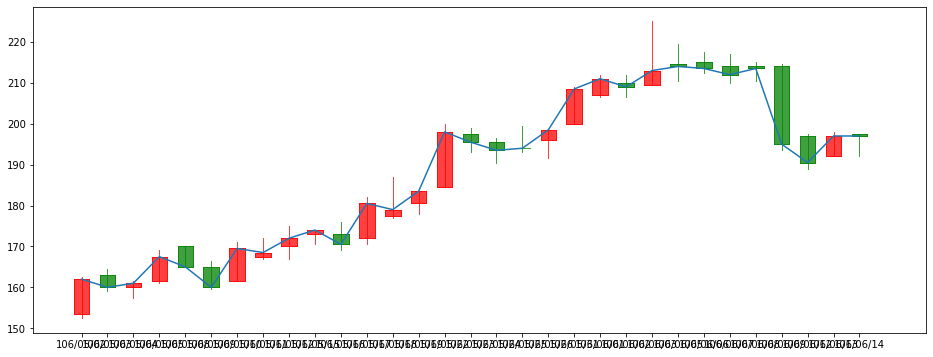

In [6]:

df3 = df1
df3=df3.drop(range(31,len(df3)))


fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df3['日期']), 1))
ax.set_xticklabels(df3['日期'][::1])
mpf.candlestick2_ochl(ax, df3['開盤價'], df3['收盤價'], df3['最高價'],df3['最低價'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.plot(df3['收盤價'])


In [ ]:
#手續費=0.0014*買價+0.0014*賣價
#賺 : 賣價 > 買價+手續費
#y>1.006*x
df2=df1[['RSI_6','RSI_12','K','D','BIAS','WMR','EMA_12','EMA_26','MACD','psy_6','MTM_6','SAR_6','DM+(DMI)','DM-(DMI)','TR(DMI)','+DI(DMI)','-DI(DMI)','ADX(DMI)','Trend']].copy()
df2=df2.drop(range(14))
df2=df2.reset_index(drop=True)
df2

In [7]:
#value that design buy or sell
List_price=np.array(df1['收盤價'])
List_ans=np.array(0)
for i in range(1,List_price.size-1):
    LP=float(List_price[i-1])
    CP=float(List_price[i])
    RP=float(List_price[i+1])
    if LP>CP and (RP > CP*1.006):
        List_ans=np.append(List_ans,1)
    elif (CP>LP*1.006) and CP>RP:
        List_ans=np.append(List_ans,-1)
    else:
        List_ans=np.append(List_ans,0)
print(List_ans)

[ 0  1  0 -1  0  1 -1  1  0 -1  1 -1  1  0 -1  0  0  0  0  0 -1  1  0  0
  0  1 -1  0  1  0  0  0  1  0 -1  0  0  0  0  0  0  1  0 -1  0  1 -1  0
  0  1 -1  1 -1  0  1 -1  0  0  0  0  0  0  0  0  0  0 -1  1 -1  0  0  1
 -1  1 -1  0  0  0  0 -1  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0
  1 -1  0  0  1 -1  0  1  0 -1  0  1  0 -1  0  1  0  0 -1  0  0  0 -1  1
 -1  0  0  0  0  0  0  1 -1  0  1 -1  0  0  0  0  0  1 -1  0  1  0  0  0
  0  0  0  0  0  1  0 -1  0  0  0  0 -1  0  0 -1  0  0  0  0 -1  0  0  1
 -1  1  0  0  0  0  0  0  0  0  1  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  1  0  0 -1  1  0 -1  0  0  0  0  0  0 -1  1 -1
  0  0  0  1 -1  0  1  0  0  0  0  1 -1  0  0  0  0  0  0  0  0  0  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0
  0 -1  0  0]
